In [ ]:
COURSEWORK AML - TASK 2

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D 
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras import Model

import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Make the storage devide accecible
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Load the data and create the dataset


In [ ]:
# Upload the data from Google Drive
train_dir = 'drive/MyDrive/imageset/train'

# Define some parameters for the photos
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

# Split the data images into 80% for training and 20% for validations
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
# train_ds = keras.utils.to_categorical(train_ds, 10) #10 is number of classes
validation_dir = 'drive/MyDrive/imageset/val'

val_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)




Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [ ]:
# Define some parameters for the images
batch_size = 32
img_height = 180
img_width = 180

In [ ]:

class_names = train_ds.class_names


Visualization of the data


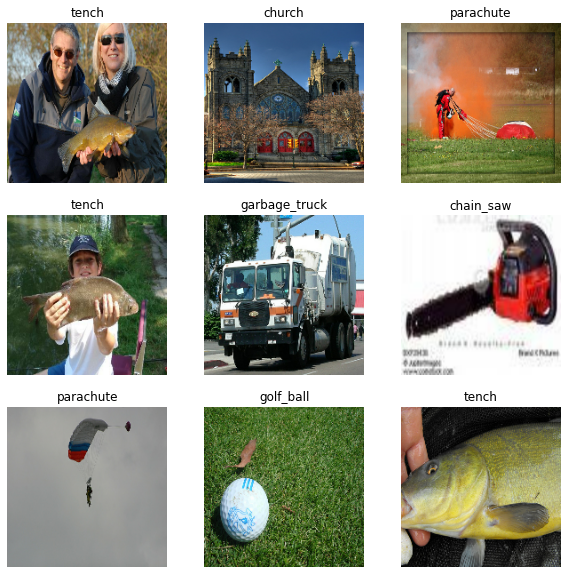

In [ ]:
# Create a dictionary and rename the classes names 

class_names = train_ds.class_names

names_dict = {
    'n01440764' : 'tench',
    'n02102040' : 'English_springer',
    'n02979186' : 'cassette_player',
    'n03000684' : 'chain_saw',
    'n03028079' : 'church',
    'n03394916' : 'French_horn',
    'n03417042' : 'garbage_truck',
    'n03425413' : 'gas_pump',
    'n03445777' : 'golf_ball',
    'n03888257' : 'parachute'
}

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    http://localhost:8889/notebooks/OneDrive/Desktop/Applied%20Machine%20Learning%20-%20CW/Coursework%20AML%20-%20Task%202.ipynb#ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(names_dict[class_names[labels[i]]])
    plt.axis("off")

In [ ]:
# Now we want to see the tenson of the shape

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Configure the dataset

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# Keep in the memory the images after they loaded for the first epoch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Overlap the data processing while it trains
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize of the data

In [ ]:
# Scale the data from [0,1]
normalization_layer = layers.Rescaling(1./255)


In [ ]:
# Normalize the data
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.99850523


Creation of the Model

In [ ]:
num_classes = len(class_names)

# Layers
model = Sequential([
  # Rescaling layer input values to a new range
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # Convolutional Layer of 16 kernel numbers and kernel size 3
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # Max Pooling Layer
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Flatten Layer to convert from 2D image to 1D vector
  layers.Flatten(),
  # Dense layer with output size 128
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model

In [ ]:
# Compiling the model with optimizer 'Adam' and use of 'Entropy'
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# See the layers of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train the model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=10
  )

Epoch 1/10
296/296 [==============================] - 1088s 4s/step - loss: 1.6101 - accuracy: 0.4584 - val_loss: 1.2925 - val_accuracy: 0.5725
Epoch 2/10
296/296 [==============================] - 324s 1s/step - loss: 1.0768 - accuracy: 0.6546 - val_loss: 1.1290 - val_accuracy: 0.6377
Epoch 3/10
296/296 [==============================] - 325s 1s/step - loss: 0.7978 - accuracy: 0.7408 - val_loss: 1.1253 - val_accuracy: 0.6497
Epoch 4/10
296/296 [==============================] - 323s 1s/step - loss: 0.5010 - accuracy: 0.8384 - val_loss: 1.2303 - val_accuracy: 0.6380
Epoch 5/10
296/296 [==============================] - 323s 1s/step - loss: 0.2366 - accuracy: 0.9283 - val_loss: 1.6538 - val_accuracy: 0.6186
Epoch 6/10
296/296 [==============================] - 320s 1s/step - loss: 0.1038 - accuracy: 0.9683 - val_loss: 1.8924 - val_accuracy: 0.6278
Epoch 7/10
296/296 [==============================] - 321s 1s/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 2.1549 - val_accuracy: 0.605

Visualise training results 

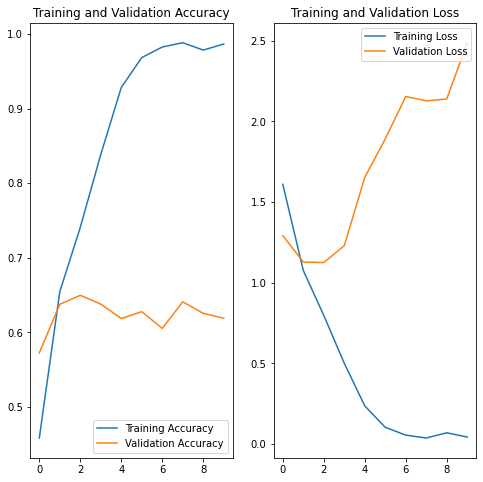

In [ ]:
# Visualise the Accuracy and Loss of both Training and Validation sets

epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data Augmentation

In [ ]:
# Due to overfitting we now try to impore using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

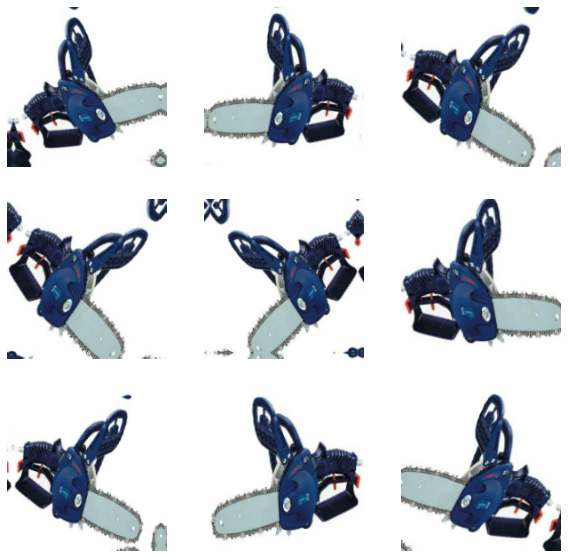

In [ ]:
# Plot augmented image example 
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Dropout

In [ ]:
# Dropout a number of units from the layer while it training
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
296/296 [==============================] - 386s 1s/step - loss: 1.7359 - accuracy: 0.4025 - val_loss: 1.5753 - val_accuracy: 0.4925
Epoch 2/15
296/296 [==============================] - 390s 1s/step - loss: 1.3532 - accuracy: 0.5474 - val_loss: 1.4624 - val_accuracy: 0.5361
Epoch 3/15
296/296 [==============================] - 393s 1s/step - loss: 1.2124 - accuracy: 0.6011 - val_loss: 1.4942 - val_accuracy: 0.5462
Epoch 4/15
296/296 [==============================] - 390s 1s/step - loss: 1.1181 - accuracy: 0.6266 - val_loss: 1.5443 - val_accuracy: 0.5233
Epoch 5/15
296/296 [==============================] - 388s 1s/step - loss: 1.0369 - accuracy: 0.6576 - val_loss: 1.3897 - val_accuracy: 0.5799
Epoch 6/15
296/296 [==============================] - 388s 1s/step - loss: 0.9916 - accuracy: 0.6730 - val_loss: 1.2692 - val_accuracy: 0.5944
Epoch 7/15
296/296 [==============================] - 394s 1s/step - loss: 0.9358 - accuracy: 0.6942 - val_loss: 1.3005 - val_accuracy: 0.5990

Visualise training results 

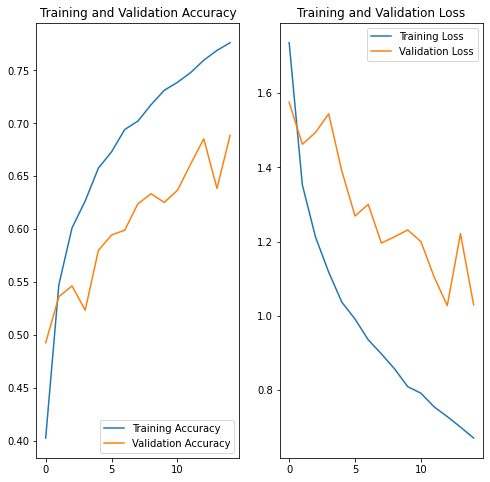

In [ ]:
# Visualise the Accuracy and Loss of both Training and Validation sets

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()